# В Начале обучим нашу нейросеть (датасет digits)

## Инициализируем датасет mnist

In [1]:
from tensorflow.keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

2024-05-21 04:54:20.450420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 04:54:21.225777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Иницализируем нашу модель (используем MobileNetV3)

/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-21 04:54:22.372247: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 04:54:22.391554: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torv

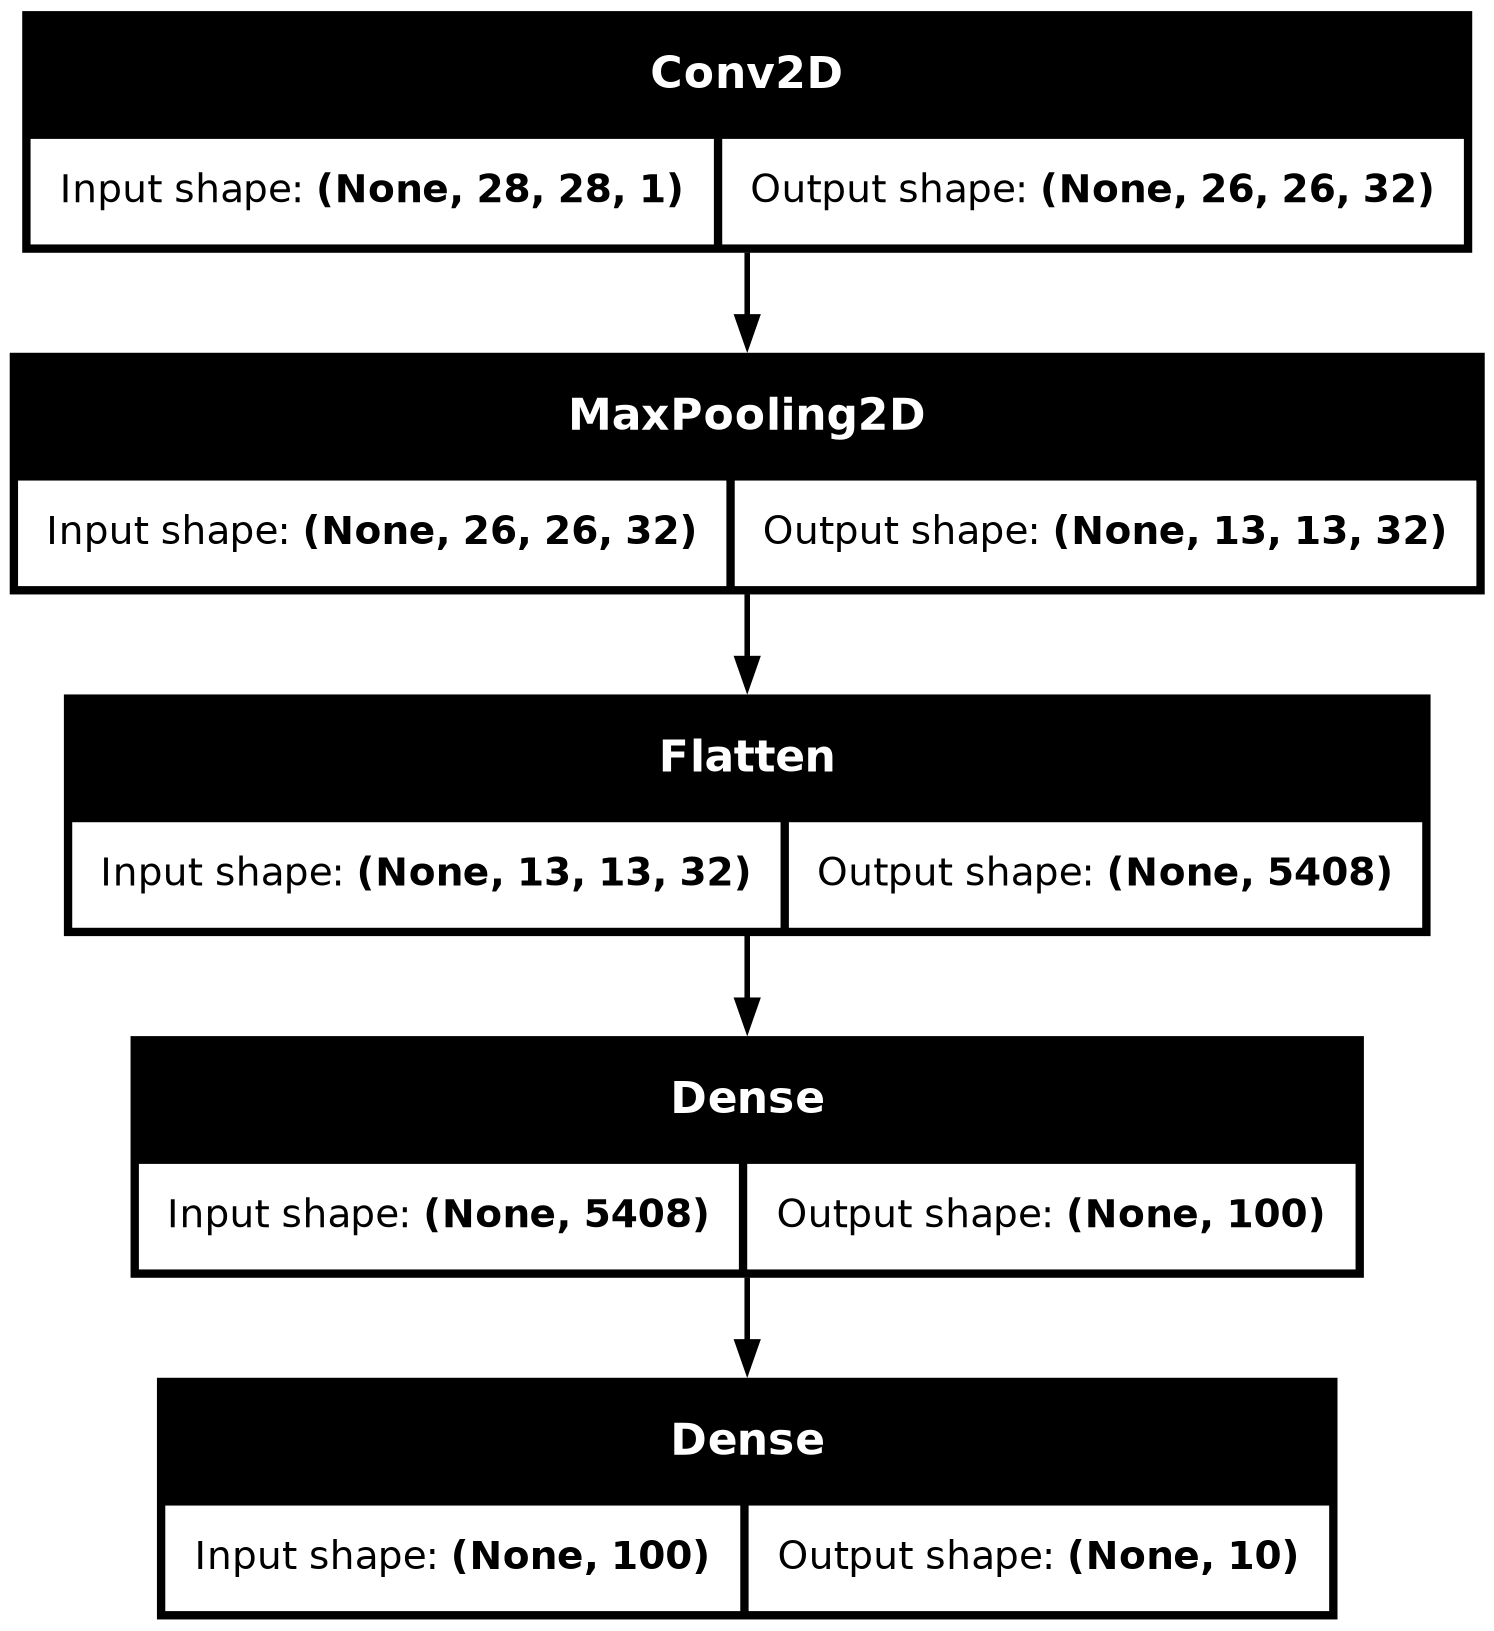

In [2]:
from tensorflow import keras
from tensorflow.keras import layers


def build():
    model = keras.models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(10, activation='softmax')
    ])

    loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer='Adam',
                  loss=loss_fn,
                  metrics=['accuracy'])
    return model


model = build()

keras.utils.plot_model(model, show_shapes=True)


## Обучаем модель

In [3]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=100, epochs=10)

Epoch 1/10


/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1716256463.324738   23258 service.cc:145] XLA service 0x73c3d4008470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716256463.324757   23258 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-05-21 04:54:23.338838: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-21 04:54:23.420661: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


185/600 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.6321 - loss: 66.3509

I0000 00:00:1716256464.899052   23258 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7093 - loss: 27.3865 - val_accuracy: 0.8445 - val_loss: 0.6996
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.8476 - loss: 0.6745 - val_accuracy: 0.8854 - val_loss: 0.5530
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.8873 - loss: 0.5077 - val_accuracy: 0.9140 - val_loss: 0.4601
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.9110 - loss: 0.4210 - val_accuracy: 0.8774 - val_loss: 0.5142
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9130 - loss: 0.3924 - val_accuracy: 0.9205 - val_loss: 0.3571
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9321 - loss: 0.3242 - val_accuracy: 0.9426 - val_loss: 0.3707
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9421 - loss: 0.2793 - val_accuracy: 0.9267 - val_loss: 0.3678
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9513 - loss: 0.2244 - val_accuracy

## Небольшой тест что модель работает

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


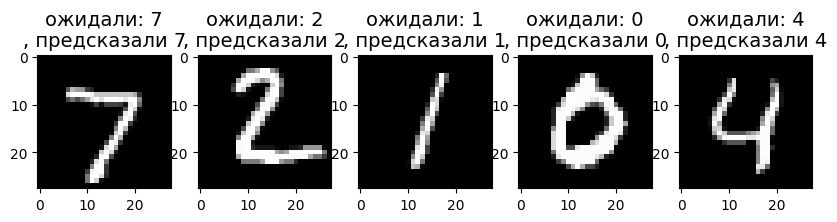

In [7]:
import numpy as np
import matplotlib.pyplot as plt

test_subset = test_X[:5]
predicted = model.predict(test_subset)

plt.figure(figsize=(10, 10))
for index, (image, expected, actual) in enumerate(zip(test_subset, test_y[:5], predicted)):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.astype(np.uint), cmap='gray')
    plt.title(f'ожидали: {expected}\n, предсказали {np.argmax(actual)}', fontsize=14)

# Визуализирем слои

## Визуализируем фильты

In [53]:
import matplotlib.pyplot as plt


def plot_filters(filters):
    #looping through all the kernels in each channel

    w, h, channels, n_filters = filters.shape
    ix = 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(channels):
            # specify subplot and turn of axis
            ax = plt.subplot(channels, n_filters, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()


# show the figure
plt.show()


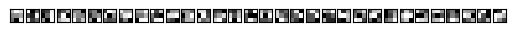

In [54]:
def plot_weights(model, layer_num):
    layer = model.layers[layer_num]

    #checking whether the layer is convolution layer or not 
    if isinstance(layer, layers.Conv2D):
        filters, biases = layer.get_weights()

        # normalize filter values to 0-1 so we can visualize them
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

        plot_filters(filters)
    else:
        print("Can only visualize layers which are convolutional")


plot_weights(model, 0)  # plot first conv layer

## Визуализируем Feature Map

In [67]:
def prepare_model(model, layer_num):
    return keras.models.Model(inputs=model.inputs, outputs=model.layers[layer_num].output)


prepared_model = prepare_model(model, 0)

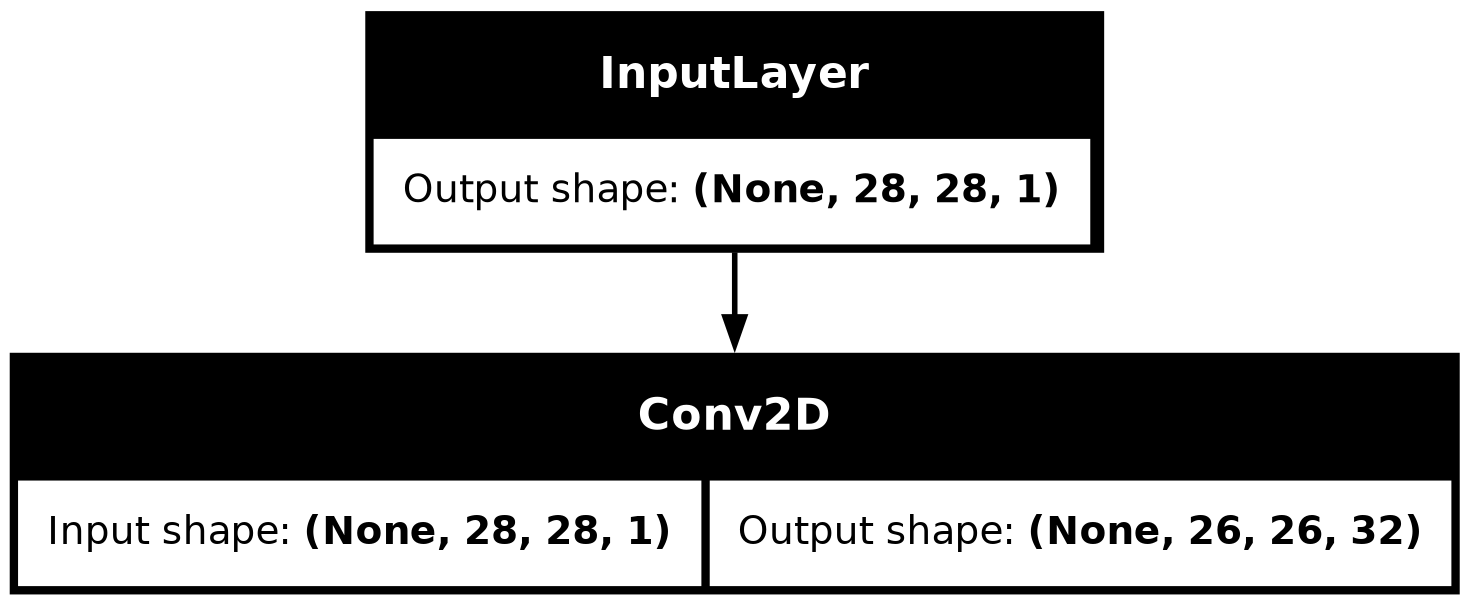

In [68]:
keras.utils.plot_model(prepared_model, show_shapes=True)

берем первый элемент из тестового датасета, прогоняем на модифицированной модели

In [86]:
test_subset = test_X[0:5]
predicted = prepared_model.predict(test_subset)
predicted.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(5, 26, 26, 32)

Визуализируем

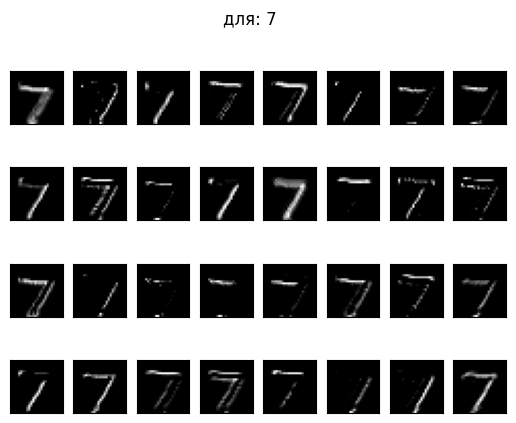

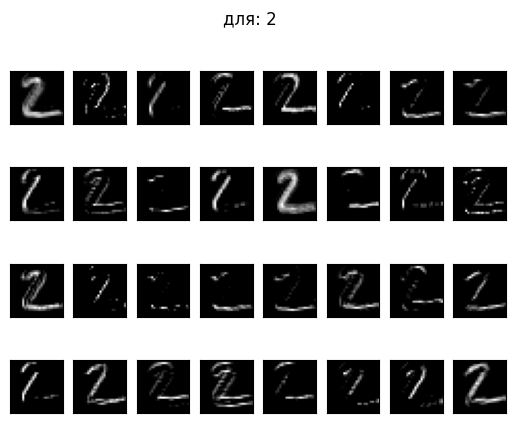

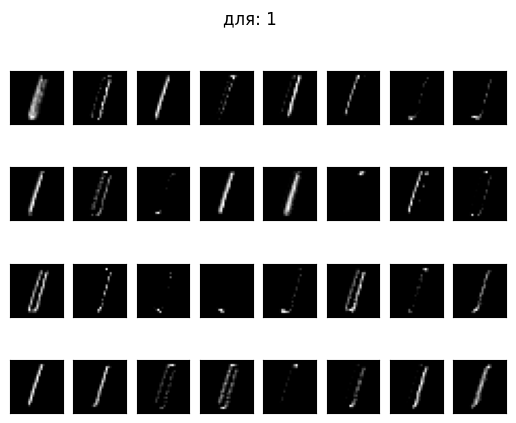

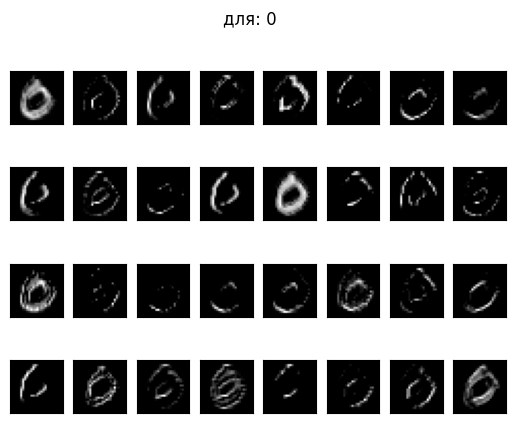

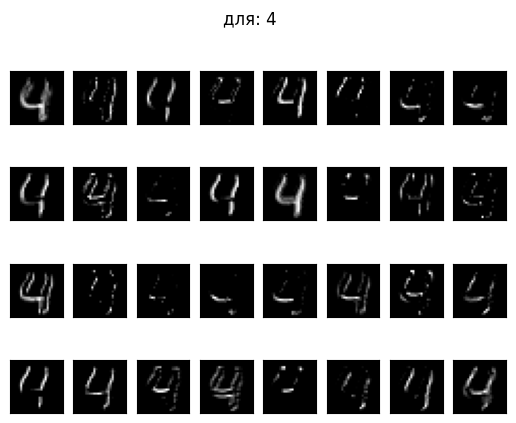

In [90]:
case, w, h, n_samples = predicted.shape
for c in range(case):
    ix = 1
    for i in range(n_samples):
        ax = plt.subplot(4, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(predicted[c, :, :, i], cmap='gray')
        ix += 1
    # show the figure
    plt.suptitle(f'для: {test_y[c]}')
    plt.show()
